## 数据预处理

In [23]:
import os 

os.makedirs(os.path.join('.','data'), exist_ok = True) #存放在当前目录下的data文件夹中,两个.则表示在上上级目录
if os.path.exists('./data/house_tiny.csv'):  
    os.remove('./data/house_tiny.csv')
data_file = os.path.join('.','data','house_tiny.csv')


In [24]:
with open(data_file,'w') as f:
    f.write('NumRooms,Alley,Price\n')
    f.write('NA,Pave,127500\n')  #一个列向分布的表格
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

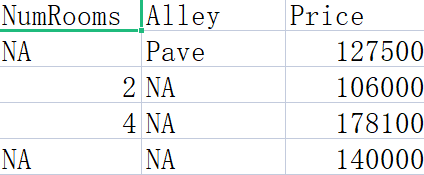

要从创建的CSV文件中加载原始数据集，我们导入pandas包并调用read_csv函数。该数据集有四行三列。其中每行描述了房间数量（“NumRooms”）、巷子类型（“Alley”）和房屋价格（“Price”）。

In [25]:
import pandas as pd 

data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


### 处理缺失值

In [27]:
inputs, outputs = data.iloc[:,0:2], data.iloc[:,2] #.iloc切分函数,0：2是取到第一列为止!
inputs = inputs.fillna(inputs.mean())  #均值替换
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


C:\Users\15874\AppData\Local\Temp/ipykernel_22924/3665920242.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  inputs = inputs.fillna(inputs.mean())


In [30]:
inputs = pd.get_dummies(inputs, dummy_na = True) #Alley只接受两种值，所以自动转化为两列Arrey_nan和Array_pave
inputs

,NumRooms,Alley_Pave,Alley_nan
0,3.0,1,0
1,2.0,0,1
2,4.0,0,1
3,3.0,0,1


#### pd  ---  tensor 

In [37]:
import torch 
X,y = torch.tensor(inputs.values), torch.tensor(outputs.values)
print(X.shape,y.shape)
print(X,y)


torch.Size([4, 3]) torch.Size([4])
tensor([[3., 1., 0.],
        [2., 0., 1.],
        [4., 0., 1.],
        [3., 0., 1.]], dtype=torch.float64) tensor([127500, 106000, 178100, 140000])


### 练习:删除缺失值最多的列

In [38]:
data

,NumRooms,Alley,Price
0,NaN,Pave,127500
1,2.0,NaN,106000
2,4.0,NaN,178100
3,NaN,NaN,140000
